In [3]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

<IPython.core.display.Javascript object>


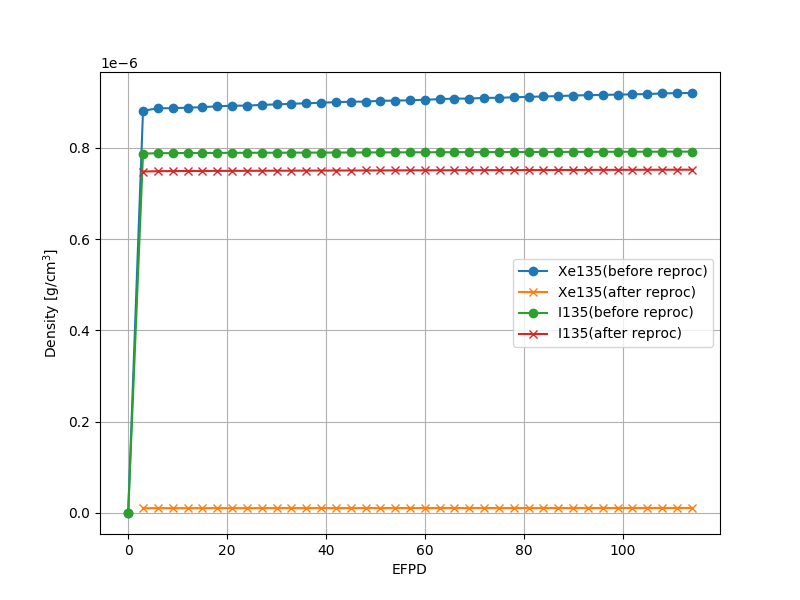

Xe-135 removal efficiency  [ 0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988
  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988
  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988
  0.988  0.988  0.988  0.988  0.988  0.988  0.988  0.988]
I-135 removal efficiency  [ 0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05
  0.05  0.05]


In [19]:
db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
step = 3  # days

db = tb.open_file(db_file, mode='r')
# print(db)
#days2 = np.arange(step, (len(k_bds)+1)*(step), step, dtype=np.float64)


fuel_bef_mat = db.root.materials.fuel.before_reproc.parameters
fuel_bef = db.root.materials.fuel.before_reproc.comp
isomap = fuel_bef.attrs.iso_map

fuel_after_mat = db.root.materials.fuel.after_reproc.parameters
fuel_after = db.root.materials.fuel.after_reproc.comp


mass_b = np.array([x['mass'] for x in fuel_bef_mat.iterrows()])
vol_b = np.array([x['volume'] for x in fuel_bef_mat.iterrows()])
dens_b = np.array([x['density'] for x in fuel_bef_mat.iterrows()])

mass_a = np.array([x['mass'] for x in fuel_after_mat.iterrows()])
vol_a = np.array([x['volume'] for x in fuel_after_mat.iterrows()])
dens_a = np.array([x['density'] for x in fuel_after_mat.iterrows()])


days_b = np.array(step*np.arange(len(mass_b)))
days_a = np.arange(step, (len(mass_a)+1)*(step), step, dtype=np.float64)

print_iso = ['Xe135', 'I135']

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax = fig_1.add_subplot(111)
ax.grid(True)

mass_b = {}
mass_a = {}


for iso in print_iso:
    mass_b[iso] = np.array([row[isomap[iso]] for row in fuel_bef])
    mass_a[iso] = np.array([row1[isomap[iso]] for row1 in fuel_after])
    ax.plot(days_b, mass_b[iso]/vol_b, 'o-', label=str(iso)+'(before reproc)')
    ax.plot(days_a, mass_a[iso]/vol_a, 'x-', label=str(iso)+'(after reproc)')

ax.legend(loc=0)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax.set_ylabel('Absolute mass [g]')
ax.set_ylabel('Density [g/cm$^3$]')
ax.set_xlabel('EFPD')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
#ax.set_ylim([1.05, 1.06])
fig_1.show()



db.close()

xe_step_removal = (mass_b['Xe135'][1:] - mass_a['Xe135'])/mass_b['Xe135'][1:]
i_step_removal = (mass_b['I135'][1:] - mass_a['I135'])/mass_b['I135'][1:]
print("Xe-135 removal efficiency ", xe_step_removal)
print("I-135 removal efficiency ", i_step_removal)

In [ ]:
db.close()